In [1]:
import tensorflow as tf

def parse_examples(serialized_examples, feature_description):
    examples = tf.io.parse_example(serialized_examples, feature_description)
    targey_key = list(examples.keys())[1]
    targets = examples.pop(targey_key)
    images = tf.image.resize_with_pad(
        tf.cast(tf.io.decode_jpeg(examples["image"], channels=3), tf.float32), 299, 299
    )
    return images, targets

In [2]:
import tensorflow as tf
# import preprocessDefinition as preprocess
from matplotlib import pyplot as plt
import pandas as pd

def plot_imgs(data):
    cnt = 1
    plt.figure(figsize=(32,16))
    for img, label in data:
        plt.subplot(4,8,cnt)
        plt.imshow(img.numpy())
        plt.axis('off')
        plt.title(label)
        cnt=cnt+1
    plt.show()

def preporc(raw_dataset):
    dataset = raw_dataset.map(lambda serialized_examples: parse_examples(serialized_examples, feature_description), num_parallel_calls=2).map(
        lambda data,label: (tf.keras.applications.xception.preprocess_input(data), label), num_parallel_calls=2
        ).batch(32)
    return dataset

train_raw_dataset = tf.data.TFRecordDataset(["./datasets/birds-vs-squirrels-train.tfrecords"])
valid_raw_dataset = tf.data.TFRecordDataset(["./datasets/birds-vs-squirrels-validation.tfrecords"])
feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string),
    "label": tf.io.FixedLenFeature([], tf.int64),
}

# you can edit batch size and num_parallel calls below based on your architecture
train_dataset = preporc(train_raw_dataset)
valid_dataset = preporc(valid_raw_dataset)

In [ ]:
# Model Creation
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(3, activation="softmax")(avg)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.summary()

for layer in base_model.layers:
    layer.trainable = False

# for layer in model.layers:
#     print(layer.trainable)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('birdsVsSquirrelsModel', save_best_only=True)
earlyStop_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
ss=5e-1
optimizer = tf.keras.optimizers.SGD(learning_rate=ss)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=15, callbacks=[checkpoint_cb, earlyStop_cb])

In [14]:
model.save('birdsVsSquirrelsModel')

INFO:tensorflow:Assets written to: birdsVsSquirrelsModel/assets


INFO:tensorflow:Assets written to: birdsVsSquirrelsModel/assets


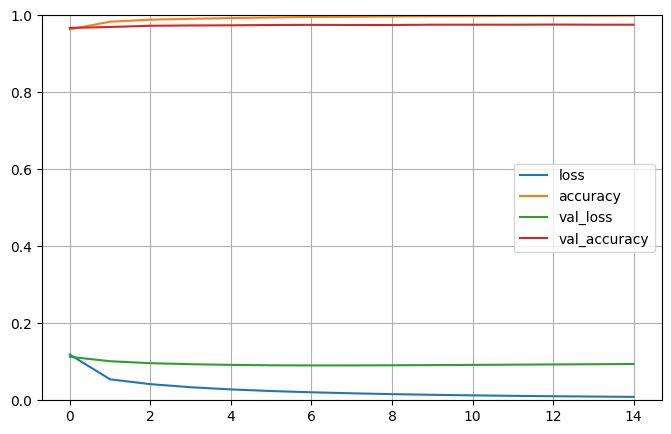

In [13]:
# Plotting the accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

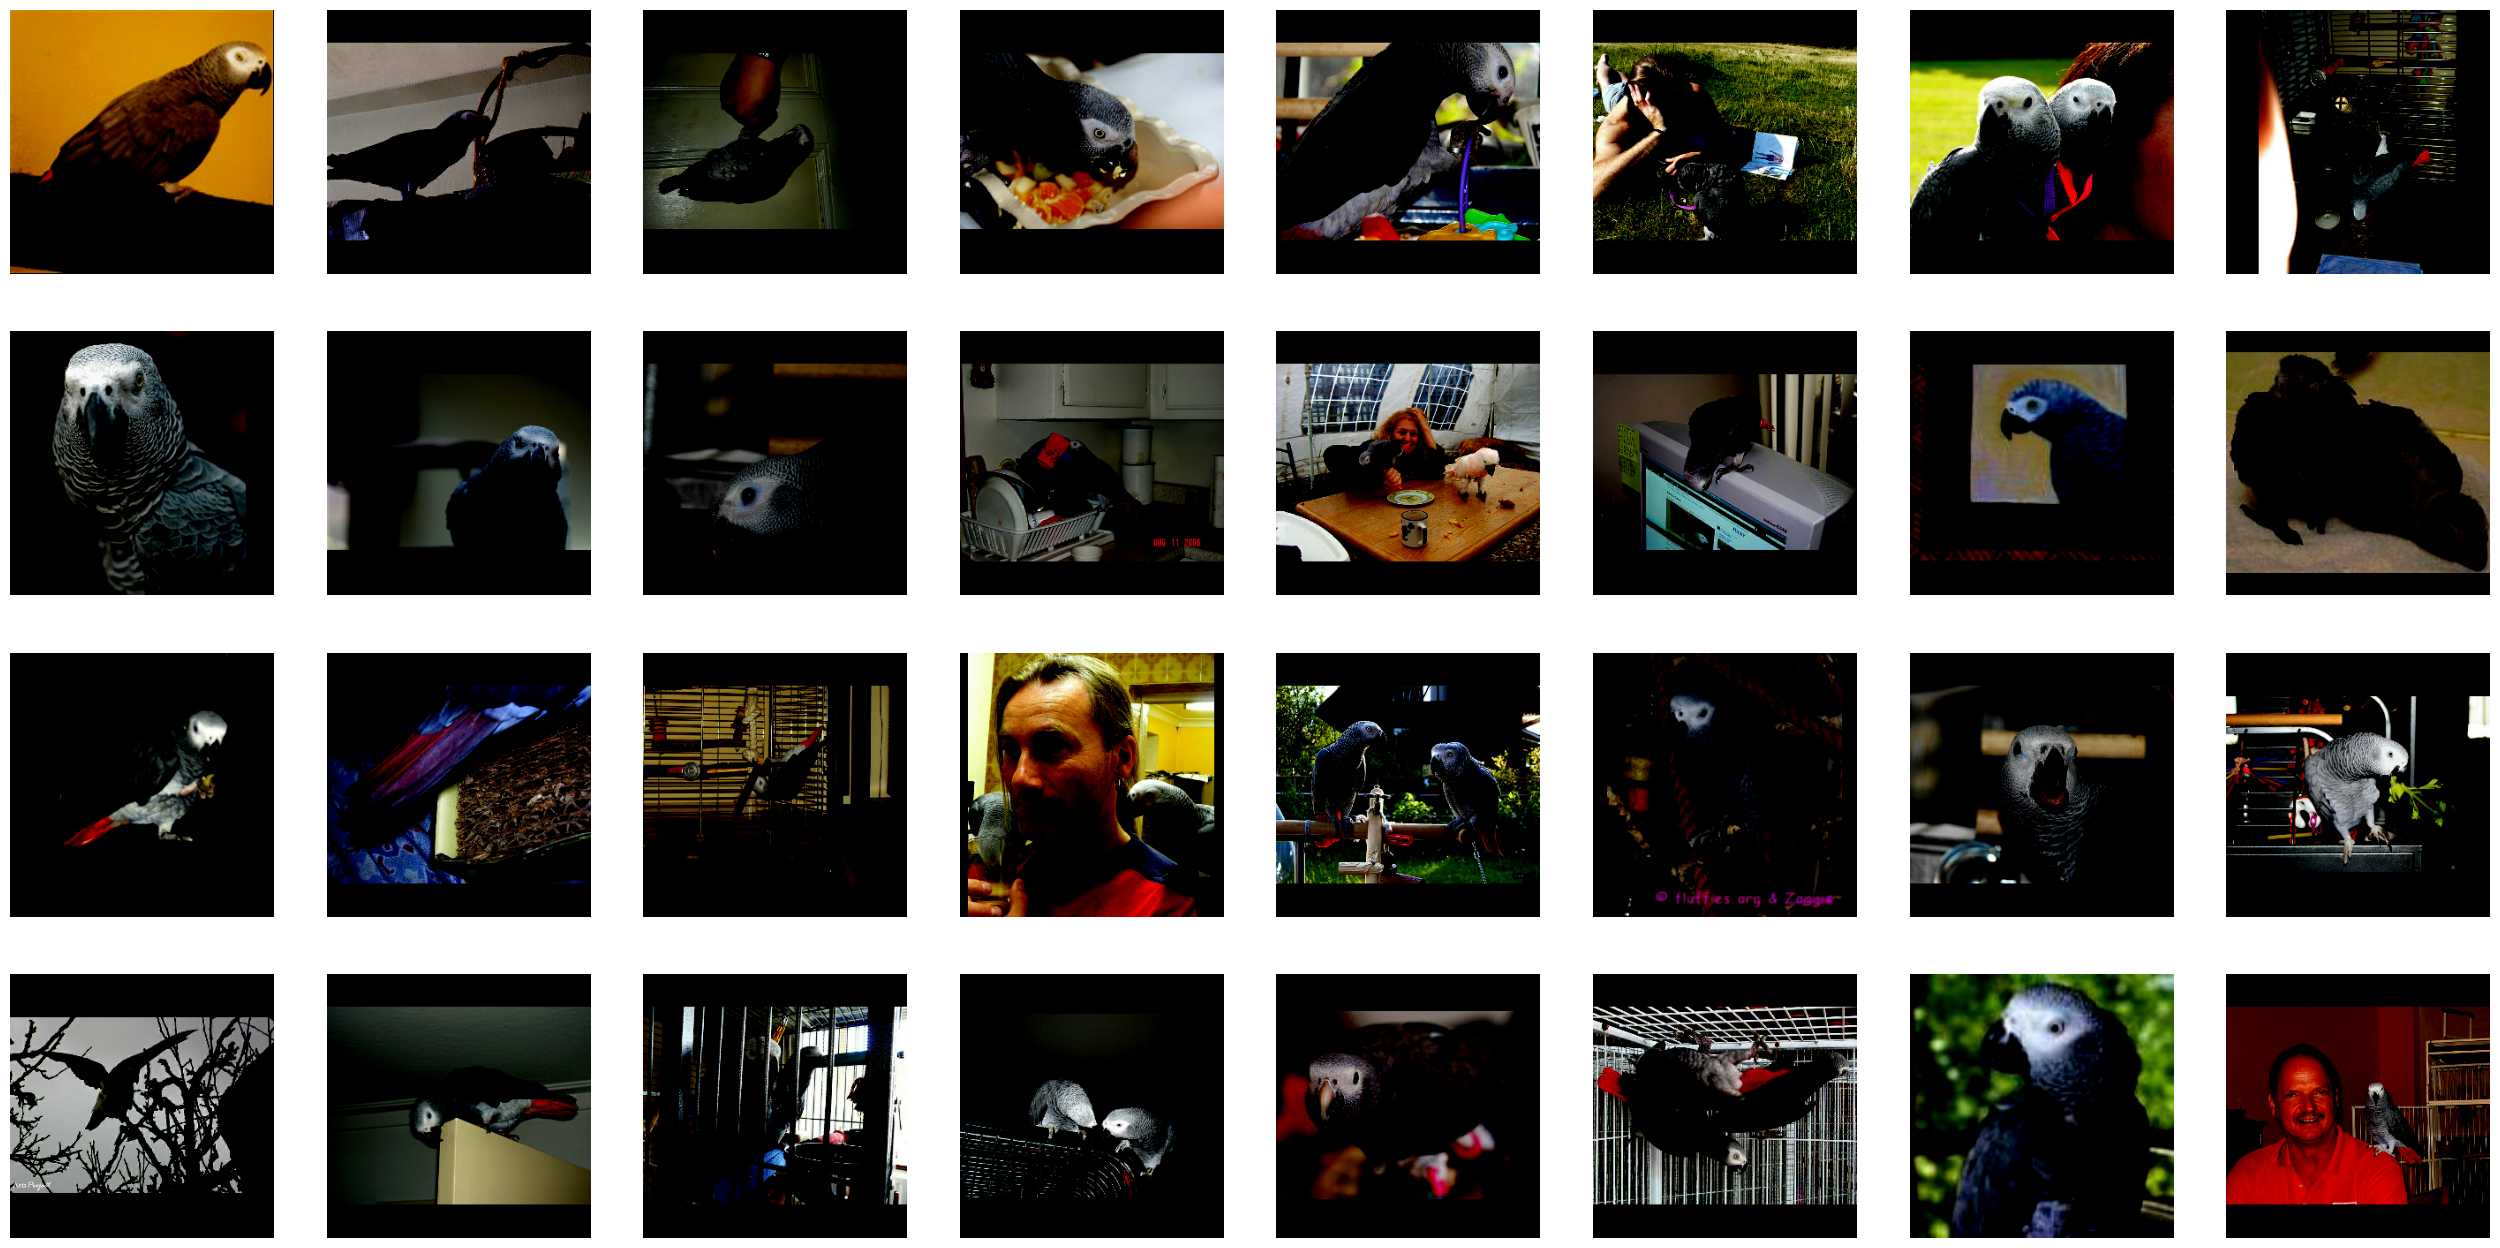

In [22]:
import tensorflow as tf
# import preprocessDefinition as preprocess
from matplotlib import pyplot as plt
import pandas as pd

def parse_examples(serialized_examples, feature_description):
    examples = tf.io.parse_example(serialized_examples, feature_description)
    images = examples.pop("image")
    resized_images = tf.image.resize_with_pad(
        tf.cast(tf.io.decode_jpeg(images, channels=3), tf.float32), 299, 299
    )
    targey_key = list(examples.keys())[0]
    targets = examples[targey_key]
    return resized_images, targets

# def plot_imgs(data):
#     cnt = 1
#     plt.figure(figsize=(32,16))
#     for img, label in data:
#         plt.subplot(4,8,cnt)
#         plt.imshow(img.numpy())
#         plt.axis('off')
#         plt.title(label)
#         cnt=cnt+1
#     plt.show()

def preporc(raw_dataset):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "birdType": tf.io.FixedLenFeature([], tf.int64),
    }
    dataset = raw_dataset.map(lambda serialized_examples: parse_examples(serialized_examples, feature_description), num_parallel_calls=2).map(
        lambda data,label: (tf.keras.applications.xception.preprocess_input(data), label), num_parallel_calls=2
        ).batch(32)
    return dataset

train_raw_dataset = tf.data.TFRecordDataset(["./datasets/augumentedimages.tfrecord"])

# you can edit batch size and num_parallel calls below based on your architecture
train_dataset = preporc(train_raw_dataset)


cnt = 1
plt.figure(figsize=(32,16))
for el in train_dataset.unbatch().take(32):
    # print(el)
    plt.subplot(4,8,cnt)
    plt.imshow(el[0].numpy())
    plt.axis('off')
    # plt.title(label)
    cnt=cnt+1
# plt.show()
